# Salary Prediction using Linear Regression


এই নোটবুকে আমরা লিনিয়ার রিগ্রেশন ব্যবহার করে অভিজ্ঞতার
 বছর (Experience Years) থেকে বেতন (Salary) অনুমান করার একটি উদাহরণ দেখবো। ধাপে ধাপে ডেটা লোড, এক্সপ্লোরেটরি ডেটা অ্যানালাইসিস (EDA), মডেল তৈরি, মূল্যায়ন এবং ফলাফল বিশ্লেষণ করা হবে।


In [ ]:
# Import necessary libraries
import pandas as pd # For data processing
from matplotlib import pyplot as plt # For data visualization

In [54]:
# Load the dataset and display the first few rows

df = pd.read_csv("Salary Data.csv", sep=',')
df.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


# EDA


In [ ]:
# Import ProfileReport for Exploratory Data Analysis (EDA)
from ydata_profiling import ProfileReport

In [56]:
# Generate and display the profiling report of the data
profile = ProfileReport(df,title='Profiling Report')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<?, ?it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Linear Regression


In [ ]:
# Import and initialize the Linear Regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [58]:
# Display the column names of the dataset
column_names = df.columns
print(column_names)

Index(['Experience Years', 'Salary'], dtype='object')


In [ ]:
# Define the feature (X) and target (y) variables
x = df[['Experience Years']]
y = df['Salary']

In [60]:
# Fit the linear regression model
reg.fit(x,y)

LinearRegression()

In [61]:
# Predict the salary for 5 years of experience
reg.predict([[5]])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([73291.26829762])

In [62]:
# Add the predicted salary to the dataframe and display the first few rows
df['predicted_salary']=reg.predict(x)
df.head()

,Experience Years,Salary,predicted_salary
0,1.1,39343,36149.031319
1,1.2,42774,37101.396369
2,1.3,46205,38053.761420
3,1.5,37731,39958.491522
4,2.0,43525,44720.316775


In [63]:
# Check the model score (R^2 value)
reg.score(x,y)

0.9558814451799361

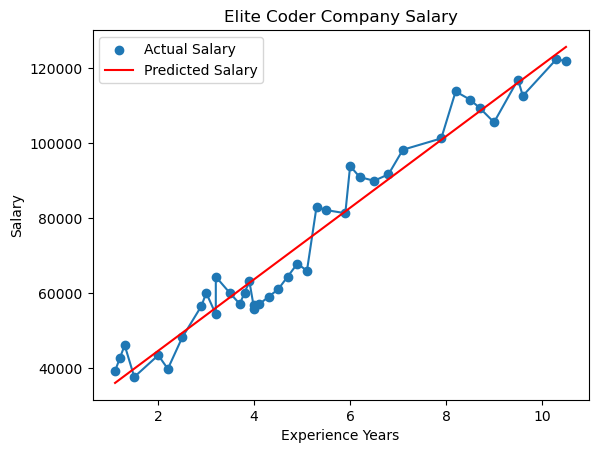

In [75]:
# Plot actual and predicted salary on a graph
plt.plot(df['Experience Years'], df['Salary'])
plt.scatter(df['Experience Years'], df['Salary'], label='Actual Salary')
plt.plot(df['Experience Years'], df['predicted_salary'], color='red', label='Predicted Salary')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.title('Elite Coder Company Salary')
plt.legend()
plt.show()


In [76]:
# Calculate and display the R-squared (R²) value of the model
from sklearn.metrics import r2_score
score = r2_score(y,df['predicted_salary'])
score

0.9558814451799361

# Cost & Lose


In [77]:
# Calculate the model's loss (Mean Squared Error) and cost (Mean Absolute Error)
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Squared Error (Loss) and Mean Absolute Error (Cost)
loss = mean_squared_error(y, df['predicted_salary'])
cost = mean_absolute_error(y, df['predicted_salary'])

print("Mean Squared Error (Loss):", loss)
print("Mean Absolute Error (Cost):", cost)

Mean Squared Error (Loss): 28960383.65377621
Mean Absolute Error (Cost): 4516.281792544623
